**Project Title : TrendCast - Time-Series Forecasting for Retail Sales**

**Objective** : Forecast weekly retail sales using time-series modeling to support inventory planning and revenue projections.

**Business Context** : Retail businesses rely on accurate sales forecasts to manage stock, staffing, and promotions. Time-series models help anticipate demand and reduce operational risk.

**Workflow Overview** :
- Simulate weekly sales data  
- Visualize trends and seasonality  
- Apply rolling averages and decomposition  
- Fit ARIMA model for forecasting  
- Compare actual vs. predicted sales  
- Summarize insights and business recommendations

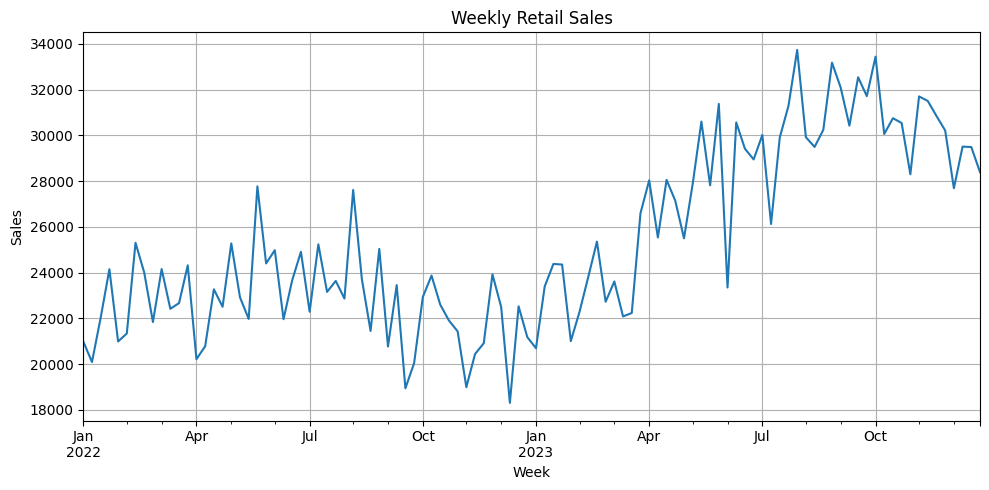

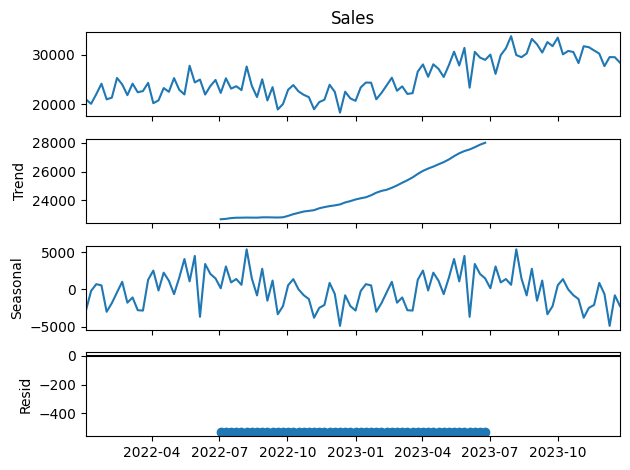

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


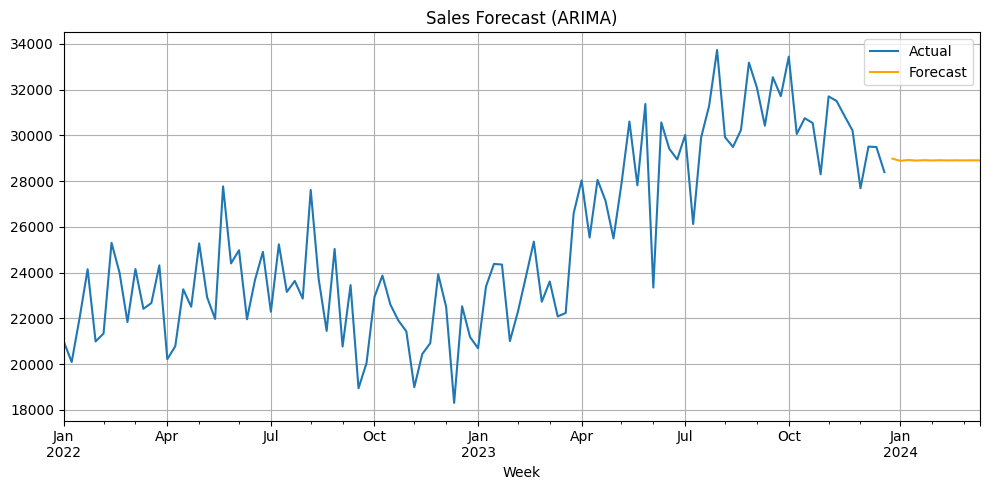

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Step 2: Simulate weekly sales data
np.random.seed(42)
weeks = pd.date_range(start='2022-01-01', periods=104, freq='W')
trend = np.linspace(20000, 30000, len(weeks))
seasonality = 3000 * np.sin(np.linspace(0, 3*np.pi, len(weeks)))
noise = np.random.normal(0, 2000, len(weeks))
sales = trend + seasonality + noise

df = pd.DataFrame({'Week': weeks, 'Sales': sales})
df.set_index('Week', inplace=True)

# Step 3: Visualize time-series
plt.figure(figsize=(10,5))
df['Sales'].plot()
plt.title('Weekly Retail Sales')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Decompose
decomp = seasonal_decompose(df['Sales'], model='additive')
decomp.plot()
plt.tight_layout()
plt.show()

# Step 5: Fit ARIMA model
model = ARIMA(df['Sales'], order=(2,1,2))
results = model.fit()
forecast = results.forecast(steps=12)

# Step 6: Plot forecast
plt.figure(figsize=(10,5))
df['Sales'].plot(label='Actual')
forecast.index = pd.date_range(start=df.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W')
forecast.plot(label='Forecast', color='orange')
plt.title('Sales Forecast (ARIMA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Executive Summary** :
- **Trend**: Steady upward growth with seasonal dips  
- **Model**: ARIMA(2,1,2) captures both trend and noise  
- **Forecast**: Predicts continued growth with seasonal fluctuations  
- **Recommendation**: Use forecast to plan inventory and staffing for peak periods